In [1]:
import io
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline


from sklearn.cluster import KMeans,MeanShift
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples


In [2]:
df_original = pd.read_csv("../players_20.csv")

In [3]:
df_original.sample(5)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
2517,193849,https://sofifa.com/player/193849/conor-houriha...,C. Hourihane,Conor Hourihane,28,1991-02-02,181,70,Republic of Ireland,Aston Villa,...,70+2,71+2,71+2,71+2,70+2,69+2,67+2,67+2,67+2,69+2
4510,184518,https://sofifa.com/player/184518/omer-sismanog...,O. Şişmanoğlu,Ömer Hasan Şişmanoğlu,29,1989-08-01,186,83,Germany,Yeni Malatyaspor,...,56+2,54+2,54+2,54+2,56+2,56+2,53+2,53+2,53+2,56+2
2380,768,https://sofifa.com/player/768/felipe-dal-bello...,Felipe,Felipe Dias da Silva dal Belo,34,1984-07-31,188,75,Brazil,SPAL,...,59+2,67+2,67+2,67+2,59+2,62+2,72+2,72+2,72+2,62+2
4143,244544,https://sofifa.com/player/244544/baris-alici/2...,B. Alıcı,Barış Alıcı,22,1997-06-24,180,70,Turkey,Çaykur Rizespor,...,55+2,51+2,51+2,51+2,55+2,51+2,43+2,43+2,43+2,51+2
2825,229739,https://sofifa.com/player/229739/jacek-goralsk...,J. Góralski,Jacek Góralski,26,1992-09-21,172,66,Poland,Poland,...,69+2,72+2,72+2,72+2,69+2,69+2,70+2,70+2,70+2,69+2


In [4]:
df_original.shape

(18278, 104)

In [5]:
# lista de columnas en el data set
list(df_original.columns)

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'nationality',
 'club',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'player_positions',
 'preferred_foot',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'team_position',
 'team_jersey_number',
 'loaned_from',
 'joined',
 'contract_valid_until',
 'nation_position',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_re

In [6]:
_cant_col = list(df_original.columns)
print(f"Cantidad de columnas totales: {len(_cant_col)}")

Cantidad de columnas totales: 104


*Seleccionamos las columnas que no son relevantes para el analisis*


In [7]:
_col_no_importantes = ['sofifa_id', 'player_url', 'dob', 'real_face', 'player_tags', 'team_jersey_number', 'work_rate','body_type',
                       'loaned_from', 'joined','contract_valid_until', 'nation_position', 'nation_jersey_number', 
                       'international_reputation','weak_foot','skill_moves',
                       'player_traits','ls', 'st','rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm',
                       'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb','lcb', 'cb', 'rcb', 'rb',
                       'age','height_cm','weight_kg']                

In [8]:
_col_skilss = ['attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina',
       'power_strength', 'power_long_shots', 'mentality_aggression',
       'mentality_interceptions', 'mentality_positioning',
       'mentality_vision', 'mentality_penalties', 'mentality_composure',
       'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']

In [9]:
_col_gk_skils = ['gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes',
       'gk_speed', 'gk_positioning','goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']

In [10]:
df = df_original.drop(df_original[_col_no_importantes] ,axis=1)
df_gk = df_original[df_original.team_position == 'GK']

In [11]:
df_gk.sample(5)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
9137,198285,https://sofifa.com/player/198285/lee-nicholls/...,L. Nicholls,Lee Nicholls,26,1992-10-05,191,85,England,Milton Keynes Dons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2715,219244,https://sofifa.com/player/219244/david-von-bal...,D. von Ballmoos,David von Ballmoos,24,1994-12-30,192,90,Switzerland,BSC Young Boys,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6264,163616,https://sofifa.com/player/163616/jamie-young/2...,J. Young,Jamie Young,33,1985-08-25,180,83,England,Brisbane Roar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1812,224599,https://sofifa.com/player/224599/junling-yan/2...,Yan Junling,颜骏凌,28,1991-01-28,191,83,China PR,Shanghai SIPG FC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
342,215316,https://sofifa.com/player/215316/geronimo-rull...,G. Rulli,Gerónimo Rulli,27,1992-05-20,189,84,Argentina,Montpellier HSC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.sample(5)

,short_name,long_name,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
8720,Venanzio Meirás,Venanzio Luis Meirás Correia,Brazil,Chapecoense,67,67,675000,6000,"ST, CAM",Left,...,72,74,16,37,41,14,14,12,11,16
7973,S. Ferreira,Sebastián Ferreira,Paraguay,Monarcas Morelia,67,74,1100000,3000,ST,Right,...,70,62,19,27,25,5,10,13,6,8
4763,J. Hurtado,Jan Hurtado,Venezuela,Boca Juniors,70,86,3800000,8000,ST,Right,...,76,62,27,15,20,5,8,8,10,11
4795,A. Fein,Adrian Fein,Germany,Hamburger SV,70,82,3100000,6000,"CM, CDM",Right,...,47,65,54,70,68,10,8,12,12,6
15650,N. Galle,Nick Galle,Germany,Hallescher FC,59,67,210000,1000,"LB, LM",Left,...,35,42,48,57,54,10,6,9,13,12


### Limitar la cantidad de registros a los jugadores que tengan un promedio general ('Overall') mayor a X %


In [13]:
_overall = 70
df_filtardo = df.loc[df.overall >= _overall]

In [14]:
# cantidad de registros unicos de nacionalidad
print(f"Cantidad de paises: {len(df_filtardo.nationality.unique())}")

Cantidad de paises: 125


In [15]:
#cantidad de registros por nacionalidad
cant_reg = df_filtardo.groupby(by=['nationality'],)['short_name'].count().sort_values(ascending=False)

La cantidad de jugadores (con overall >= 70%) por paices esta desbalanceado

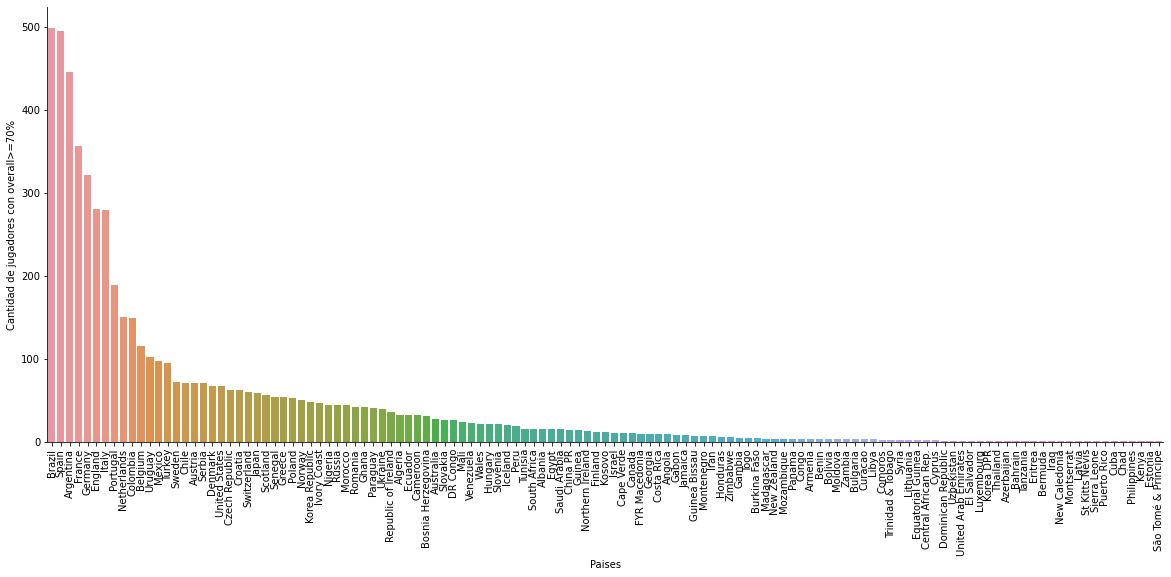

In [16]:
plt.figure(figsize=(20,8))
sns.barplot(x=cant_reg.index,y=cant_reg.values)
sns.despine()
plt.xticks(rotation=90)
plt.title = 'Cantidad de jugadores por pais'
plt.xlabel('Paises')
plt.ylabel(f'Cantidad de jugadores con overall>={_overall}%')
plt.show()

### Limpieza de datos y escalado de columna de valor/salario

In [17]:
df_nombres_club = df_filtardo.loc[:,['short_name','long_name','club', 'nationality']]

In [18]:
df_filtardo.drop(['short_name','long_name','club', 'nationality'],axis=1,inplace=True)

/home/agus/anaconda3/envs/myEnv/lib/python3.8/site-packages/pandas/core/frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [19]:
df_filtardo.sample(5)

,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,release_clause_eur,team_position,pace,shooting,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
4936,70,76,2200000,6000,"CB, CM, RB",Right,3500000.0,RCB,66.0,52.0,...,44,53,70,70,67,10,14,8,12,8
1763,75,79,6500000,11000,GK,Right,10200000.0,GK,NaN,NaN,...,23,35,20,18,16,81,68,76,73,77
377,81,81,8500000,39000,CB,Right,16200000.0,CB,60.0,43.0,...,51,75,81,83,83,13,11,9,11,7
5071,70,73,2300000,7000,"ST, CAM",Right,3700000.0,RS,67.0,70.0,...,56,71,43,36,33,13,15,15,16,13
4260,71,74,2600000,9000,CDM,Right,4300000.0,SUB,76.0,44.0,...,30,71,68,72,70,12,13,7,13,11


Las posiciones de un jugador pueden ser múltiples y estan separadas por ","

In [20]:
df_filtardo[['player_position_1','player_position_2', 'player_position_3']] = df_filtardo.player_positions.str.split(" ",expand=True,)
df_filtardo['player_position_1'] = df_filtardo['player_position_1'].str.replace(',', '')
df_filtardo['player_position_2'] = df_filtardo['player_position_2'].str.replace(',', '')
df_filtardo.sample(5)

/home/agus/anaconda3/envs/myEnv/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
<ipython-input-20-6efe263f3d6e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtardo['player_position_1'] = df_filtardo['player_position_1'].str.replace(',', '')
<ipython-input-20-6efe263f3d6e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,release_clause_eur,team_position,pace,shooting,...,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,player_position_1,player_position_2,player_position_3
3264,73,73,1100000,9000,"LB, CAM, LM",Left,2200000.0,LB,88.0,68.0,...,70,68,12,15,12,9,10,LB,CAM,LM
5042,70,74,2300000,17000,"CM, CDM",Right,4300000.0,SUB,66.0,60.0,...,66,60,7,9,10,13,15,CM,CDM,None
838,78,80,10500000,23000,"CB, CDM",Right,16500000.0,LCB,68.0,53.0,...,80,77,5,11,6,11,5,CB,CDM,None
2406,74,74,2700000,10000,"CM, CDM",Right,3600000.0,RCM,55.0,69.0,...,62,61,7,11,14,14,8,CM,CDM,None
4363,71,72,2400000,7000,"CB, RB",Right,3700000.0,RCB,60.0,48.0,...,69,67,13,12,13,12,14,CB,RB,None


In [21]:
df_filtardo['value_wage']=df_filtardo['value_eur']/df_filtardo['wage_eur'] # outlier, 19500 ratio

<ipython-input-21-488c151dc0fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtardo['value_wage']=df_filtardo['value_eur']/df_filtardo['wage_eur'] # outlier, 19500 ratio


Los montos de salario y valor del jugador son numero muy grandes. Se pueden dividir por 1millon para escalarlos


In [22]:
df_filtardo[['value_eur','wage_eur', 'value_wage']].head(5)

,value_eur,wage_eur,value_wage
0,95500000,565000,169.026549
1,58500000,405000,144.444444
2,105500000,290000,363.793103
3,77500000,125000,620.000000
4,90000000,470000,191.489362


*Existen atributos categoricos que son interesantes de tener en el agrupamiento como "preferred_foot"*

### Transformación de datos


*Existen muchos campos con valor NAN 
Se reemplazan por el valor 0 para numericos y N/A para objects(str)*

In [23]:
for c in df_filtardo.columns:
    # print(c, df_filtardo[c].dtype)
    if df_filtardo[c].dtype == int or df_filtardo[c].dtype == float:
        df_filtardo[c].fillna(0,inplace=True)
    if df_filtardo[c].dtype == object:
        df_filtardo[c].fillna('N/A',inplace=True)
df_filtardo.head(5)

/home/agus/anaconda3/envs/myEnv/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,release_clause_eur,team_position,pace,shooting,...,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,player_position_1,player_position_2,player_position_3,value_wage
0,94,94,95500000,565000,"RW, CF, ST",Left,195800000.0,RW,87.0,92.0,...,26,6,11,15,14,8,RW,CF,ST,169.026549
1,93,93,58500000,405000,"ST, LW",Right,96500000.0,LW,90.0,93.0,...,24,7,11,15,14,11,ST,LW,N/A,144.444444
2,92,92,105500000,290000,"LW, CAM",Right,195200000.0,CAM,91.0,85.0,...,29,9,9,15,15,11,LW,CAM,N/A,363.793103
3,91,93,77500000,125000,GK,Right,164700000.0,GK,0.0,0.0,...,18,87,92,78,90,89,GK,N/A,N/A,620.000000
4,91,91,90000000,470000,"LW, CF",Right,184500000.0,LW,91.0,83.0,...,22,11,12,6,8,8,LW,CF,N/A,191.489362


In [24]:
df_filtardo[['pace','shooting','passing','dribbling','defending', 'team_position']].sample(5)

,pace,shooting,passing,dribbling,defending,team_position
348,89.0,79.0,61.0,79.0,25.0,ST
714,0.0,0.0,0.0,0.0,0.0,GK
128,67.0,51.0,57.0,60.0,85.0,RCB
1527,86.0,73.0,70.0,81.0,28.0,CAM
3890,69.0,60.0,71.0,74.0,64.0,RCM


In [25]:
df_filtardo['value_eur_mill'] = df_filtardo['value_eur'].apply(lambda x: x/1000000)
df_filtardo['wage_eur_mill'] = df_filtardo['wage_eur'].apply(lambda x: x/1000000)
df_filtardo['release_clause_eur_mill'] = df_filtardo['release_clause_eur'].apply(lambda x: x/1000000)


<ipython-input-25-0b8f099aedb2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtardo['value_eur_mill'] = df_filtardo['value_eur'].apply(lambda x: x/1000000)
<ipython-input-25-0b8f099aedb2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtardo['wage_eur_mill'] = df_filtardo['wage_eur'].apply(lambda x: x/1000000)
<ipython-input-25-0b8f099aedb2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



Pie preferido y posición en el equipo del jugador se puede codificar para que sea valor numerico


In [26]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(df_filtardo.preferred_foot)

# Ver el resultado
dict(zip(le.classes_,le.transform(le.classes_)+1))


{'Left': 1, 'Right': 2}

In [27]:
# Agregamos una columna con el valor numerico correspondiente a la codificacion de los valores de preferred_foot
df_filtardo['pie_favorito'] = le.transform(df_filtardo.preferred_foot)

<ipython-input-27-291a8e7e7a33>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtardo['pie_favorito'] = le.transform(df_filtardo.preferred_foot)


In [28]:
df_filtardo.head()

,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,release_clause_eur,team_position,pace,shooting,...,goalkeeping_positioning,goalkeeping_reflexes,player_position_1,player_position_2,player_position_3,value_wage,value_eur_mill,wage_eur_mill,release_clause_eur_mill,pie_favorito
0,94,94,95500000,565000,"RW, CF, ST",Left,195800000.0,RW,87.0,92.0,...,14,8,RW,CF,ST,169.026549,95.5,0.565,195.8,0
1,93,93,58500000,405000,"ST, LW",Right,96500000.0,LW,90.0,93.0,...,14,11,ST,LW,N/A,144.444444,58.5,0.405,96.5,1
2,92,92,105500000,290000,"LW, CAM",Right,195200000.0,CAM,91.0,85.0,...,15,11,LW,CAM,N/A,363.793103,105.5,0.290,195.2,1
3,91,93,77500000,125000,GK,Right,164700000.0,GK,0.0,0.0,...,90,89,GK,N/A,N/A,620.000000,77.5,0.125,164.7,1
4,91,91,90000000,470000,"LW, CF",Right,184500000.0,LW,91.0,83.0,...,8,8,LW,CF,N/A,191.489362,90.0,0.470,184.5,1


In [29]:
from sklearn import preprocessing
# Organizando con funciones
def ordinal(method=preprocessing.LabelEncoder(), variable=df_filtardo.team_position, variable_1='posicion_equipo'): 
  
  method.fit(variable)

  dict(zip(method.classes_, method.transform(method.classes_)+1))

  #Agregamos una columna con el valor ordinal de la variable considerada
  df_filtardo[variable_1] = method.transform(variable)
ordinal()

# Creamos las variables correspondientes
#ordinal(variable=df_filtardo.team_position, variable_1='posicion_equipo')
ordinal(variable=df_filtardo.player_position_1, variable_1='players_position_1')
ordinal(variable=df_filtardo.player_position_2, variable_1='players_position_2')
ordinal(variable=df_filtardo.player_position_3, variable_1='players_position_3')

<ipython-input-29-e8edad5057cc>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtardo[variable_1] = method.transform(variable)


In [30]:
df_filtardo.head()

,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,release_clause_eur,team_position,pace,shooting,...,player_position_3,value_wage,value_eur_mill,wage_eur_mill,release_clause_eur_mill,pie_favorito,posicion_equipo,players_position_1,players_position_2,players_position_3
0,94,94,95500000,565000,"RW, CF, ST",Left,195800000.0,RW,87.0,92.0,...,ST,169.026549,95.5,0.565,195.8,0,26,12,3,14
1,93,93,58500000,405000,"ST, LW",Right,96500000.0,LW,90.0,93.0,...,N/A,144.444444,58.5,0.405,96.5,1,14,14,7,9
2,92,92,105500000,290000,"LW, CAM",Right,195200000.0,CAM,91.0,85.0,...,N/A,363.793103,105.5,0.290,195.2,1,0,8,0,9
3,91,93,77500000,125000,GK,Right,164700000.0,GK,0.0,0.0,...,N/A,620.000000,77.5,0.125,164.7,1,5,5,9,9
4,91,91,90000000,470000,"LW, CF",Right,184500000.0,LW,91.0,83.0,...,N/A,191.489362,90.0,0.470,184.5,1,14,8,3,9


In [31]:
# Borramos la columnas transformadas
df_filtardo.drop('preferred_foot',axis=1, inplace=True)
df_filtardo.drop('team_position',axis=1, inplace=True)

df_filtardo.drop('value_eur',axis=1, inplace=True)
df_filtardo.drop('wage_eur',axis=1, inplace=True)
df_filtardo.drop('release_clause_eur',axis=1, inplace=True)

/home/agus/anaconda3/envs/myEnv/lib/python3.8/site-packages/pandas/core/frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [32]:
#si no usamos player_positions lo descartamos
df_filtardo.drop('player_positions',axis=1, inplace=True)

In [33]:
df_filtardo.drop(['player_position_1', 'player_position_2', 'player_position_3'],axis=1, inplace=True)

In [34]:
df_filtardo.head(3)

,overall,potential,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,...,goalkeeping_reflexes,value_wage,value_eur_mill,wage_eur_mill,release_clause_eur_mill,pie_favorito,posicion_equipo,players_position_1,players_position_2,players_position_3
0,94,94,87.0,92.0,92.0,96.0,39.0,66.0,0.0,0.0,...,8,169.026549,95.5,0.565,195.8,0,26,12,3,14
1,93,93,90.0,93.0,82.0,89.0,35.0,78.0,0.0,0.0,...,11,144.444444,58.5,0.405,96.5,1,14,14,7,9
2,92,92,91.0,85.0,87.0,95.0,32.0,58.0,0.0,0.0,...,11,363.793103,105.5,0.290,195.2,1,0,8,0,9


**Ya no existen variables categoricas en el dataset**

Todas las columnas son numericas


In [35]:
df_filtardo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5658 entries, 0 to 5657
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   overall                     5658 non-null   int64  
 1   potential                   5658 non-null   int64  
 2   pace                        5658 non-null   float64
 3   shooting                    5658 non-null   float64
 4   passing                     5658 non-null   float64
 5   dribbling                   5658 non-null   float64
 6   defending                   5658 non-null   float64
 7   physic                      5658 non-null   float64
 8   gk_diving                   5658 non-null   float64
 9   gk_handling                 5658 non-null   float64
 10  gk_kicking                  5658 non-null   float64
 11  gk_reflexes                 5658 non-null   float64
 12  gk_speed                    5658 non-null   float64
 13  gk_positioning              5658 

In [36]:
df_filtardo = df_filtardo.astype(np.float16)

In [37]:
df_filtardo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5658 entries, 0 to 5657
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   overall                     5658 non-null   float16
 1   potential                   5658 non-null   float16
 2   pace                        5658 non-null   float16
 3   shooting                    5658 non-null   float16
 4   passing                     5658 non-null   float16
 5   dribbling                   5658 non-null   float16
 6   defending                   5658 non-null   float16
 7   physic                      5658 non-null   float16
 8   gk_diving                   5658 non-null   float16
 9   gk_handling                 5658 non-null   float16
 10  gk_kicking                  5658 non-null   float16
 11  gk_reflexes                 5658 non-null   float16
 12  gk_speed                    5658 non-null   float16
 13  gk_positioning              5658 

In [38]:
df_filtardo.describe(include='all',)

,overall,potential,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,...,goalkeeping_reflexes,value_wage,value_eur_mill,wage_eur_mill,release_clause_eur_mill,pie_favorito,posicion_equipo,players_position_1,players_position_2,players_position_3
count,5658.000000,5658.000000,5658.000000,5658.00000,5658.00000,5658.000000,5658.00000,5658.00000,5658.000000,5658.000000,...,5658.00000,5658.00,5658.000000,5658.000000,5658.000000,5658.000000,5658.000000,5658.000000,5658.000000,5658.000000
mean,inf,inf,inf,inf,inf,inf,inf,inf,6.902344,6.621094,...,inf,inf,6.824219,0.024292,inf,0.758301,inf,5.945312,7.332031,8.554688
std,3.824219,4.808594,23.328125,21.65625,20.65625,21.890625,23.59375,21.71875,21.718750,20.843750,...,19.34375,inf,8.562500,0.033752,16.718750,0.428223,9.515625,4.718750,3.408203,2.107422
min,70.000000,70.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,...,1.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,71.000000,73.000000,59.000000,46.00000,57.00000,62.000000,36.00000,63.00000,0.000000,0.000000,...,8.00000,177.75,2.400391,0.007000,3.500000,1.000000,10.000000,1.000000,4.000000,9.000000
50%,73.000000,76.000000,70.000000,63.00000,66.00000,70.000000,63.00000,70.00000,0.000000,0.000000,...,11.00000,280.00,4.101562,0.014999,7.050781,1.000000,21.000000,5.000000,9.000000,9.000000
75%,76.000000,80.000000,77.000000,70.00000,71.00000,75.000000,71.00000,75.00000,0.000000,0.000000,...,14.00000,461.50,8.000000,0.028000,14.652344,1.000000,29.000000,10.000000,9.000000,9.000000
max,94.000000,95.000000,96.000000,93.00000,92.00000,96.000000,90.00000,90.00000,90.000000,92.000000,...,92.00000,19504.00,105.500000,0.564941,195.750000,1.000000,29.000000,14.000000,14.000000,14.000000


In [39]:
df_filtardo.fillna(value=0,inplace=True)

## Visualización de datos

<AxesSubplot:>

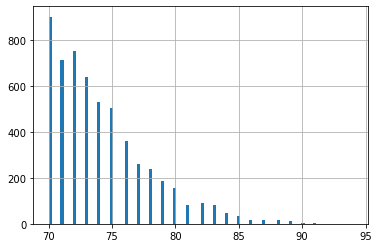

In [40]:
df_filtardo['overall'].hist(bins = 100)

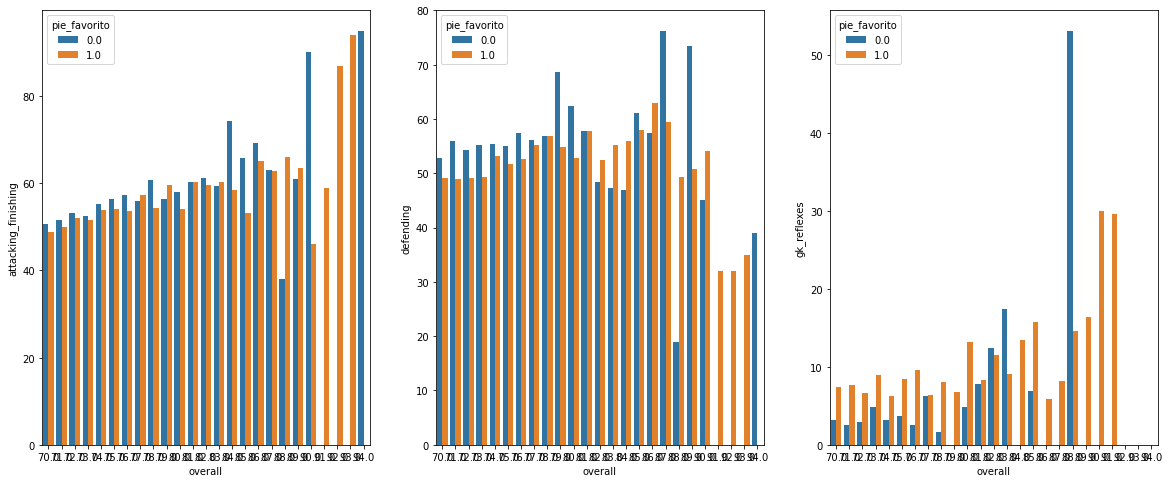

In [41]:
fig, axes = plt.subplots(1,3, figsize=(20,8),sharex=False)

sns.barplot(ax=axes[0],  x=df_filtardo.overall, y=df_filtardo.attacking_finishing, hue=df_filtardo.pie_favorito, ci=False)
sns.barplot(ax=axes[1],  x=df_filtardo.overall, y=df_filtardo.defending, hue=df_filtardo.pie_favorito, ci=False)
sns.barplot(ax=axes[2],  x=df_filtardo.overall, y=df_filtardo.gk_reflexes, hue=df_filtardo.pie_favorito, ci=False)
plt.show()

/home/agus/anaconda3/envs/myEnv/lib/python3.8/site-packages/seaborn/distributions.py:1641: FutureWarning: Use `x` and `y` rather than `data` `and `data2`
  warnings.warn(msg, FutureWarning)


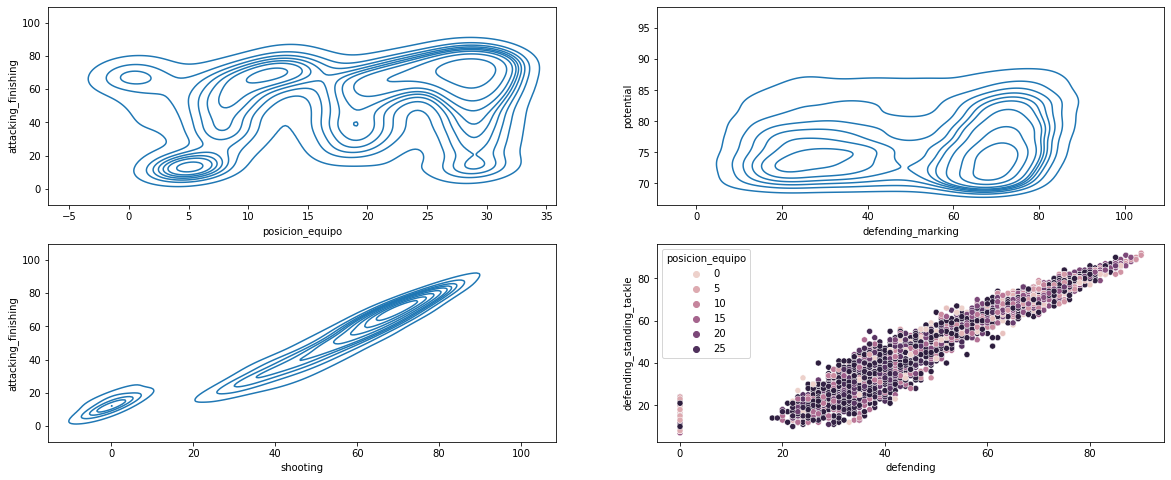

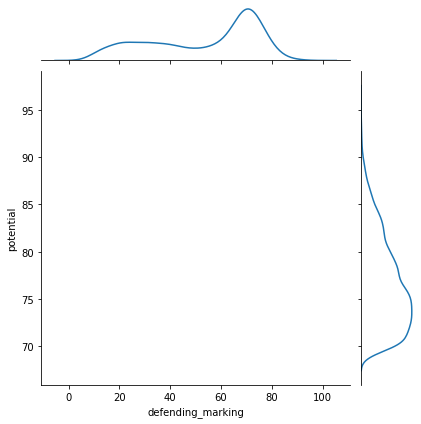

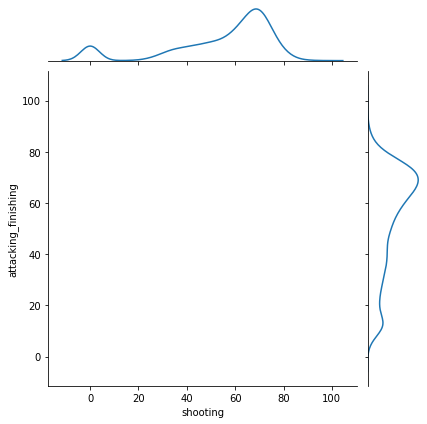

In [42]:
fig, axes = plt.subplots(2,2, figsize=(20,8),sharex=False)
sns.kdeplot(ax=axes[0,0], data=df_filtardo.posicion_equipo,data2=df_filtardo.attacking_finishing)
sns.jointplot(ax=axes[0,1], data=df_filtardo, x=df_filtardo.defending_marking, y=df_filtardo.potential, kind='kde')
sns.jointplot(ax=axes[1,0], data=df_filtardo, x=df_filtardo.shooting, y=df_filtardo.attacking_finishing, kind='kde')
sns.scatterplot(ax=axes[1,1], x=df_filtardo.defending, y=df_filtardo.defending_standing_tackle, hue=df_filtardo.posicion_equipo)
plt.show()

/home/agus/anaconda3/envs/myEnv/lib/python3.8/site-packages/seaborn/distributions.py:1641: FutureWarning: Use `x` and `y` rather than `data` `and `data2`
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='posicion_equipo', ylabel='attacking_finishing'>

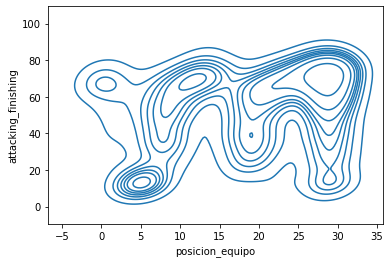

In [43]:
sns.kdeplot(data=df_filtardo.posicion_equipo,data2=df_filtardo.attacking_finishing)

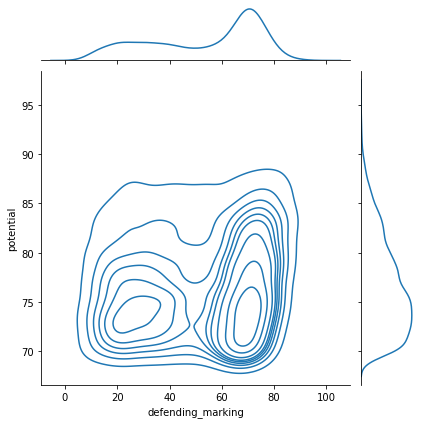

In [44]:
sns.jointplot(data=df_filtardo, x=df_filtardo.defending_marking, y=df_filtardo.potential, kind='kde')

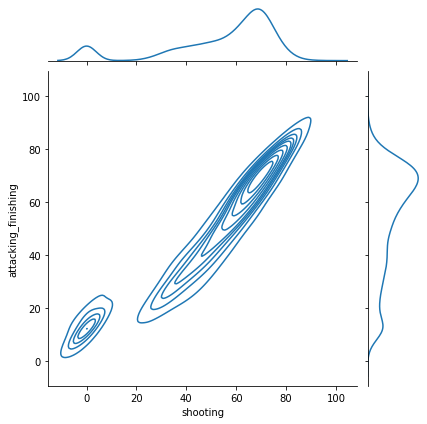

In [45]:
sns.jointplot(data=df_filtardo, x=df_filtardo.shooting, y=df_filtardo.attacking_finishing, kind='kde')

<AxesSubplot:xlabel='defending', ylabel='defending_standing_tackle'>

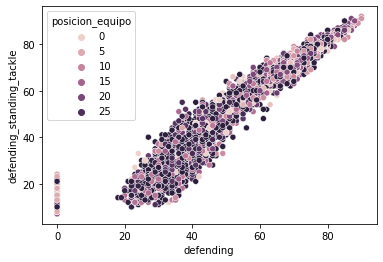

In [46]:
sns.scatterplot(x=df_filtardo.defending, y=df_filtardo.defending_standing_tackle, hue=df_filtardo.posicion_equipo)

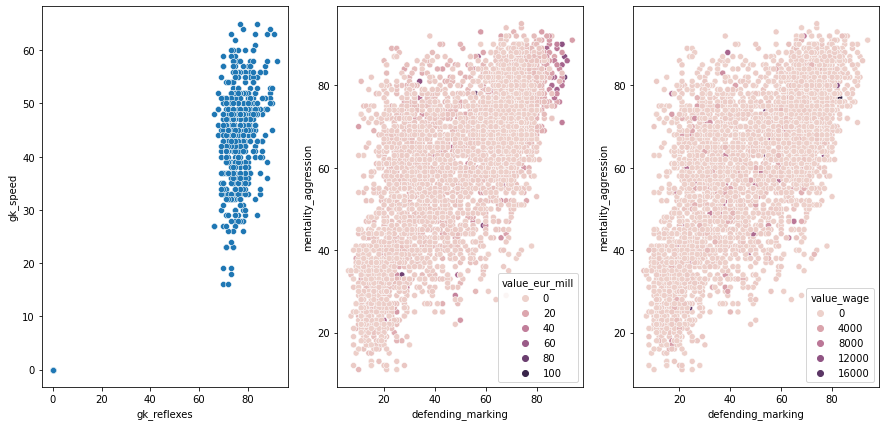

In [47]:
fig, axes = plt.subplots(1,3, figsize=(15,7))
sns.scatterplot(ax=axes[0], x=df_filtardo.gk_reflexes, y=df_filtardo.gk_speed)
sns.scatterplot(ax=axes[1],x=df_filtardo.defending_marking, y=df_filtardo.mentality_aggression, hue=df_filtardo.value_eur_mill)
sns.scatterplot(ax=axes[2],x=df_filtardo.defending_marking, y=df_filtardo.mentality_aggression, hue=df_filtardo.value_wage)
plt.show()

In [48]:
# Dropping Value_wage (because value and wage are already in)
df_filtardo.drop('value_wage',axis=1, inplace=True)

## CLUSTERING 

#### normalizar datos
standarScaler [0-1] [-1 - 1]


In [49]:
df_filtardo.loc[df_filtardo.release_clause_eur_mill == np.inf, 'release_clause_eur_mill'] = 0

In [50]:
ss = StandardScaler()
nuevo_dato = ss.fit_transform(df_filtardo)

In [51]:
_n_grupo = 4

kmeans = KMeans(n_clusters=_n_grupo)
kmeans

KMeans(n_clusters=4)

In [52]:
kmeans.fit(nuevo_dato)

KMeans(n_clusters=4)

In [53]:
kmeans.labels_

array([0, 2, 0, ..., 2, 0, 2], dtype=int32)

In [54]:
df_filtardo['GRUPOS'] = kmeans.labels_
df_filtardo.sample(6)

,overall,potential,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,...,goalkeeping_reflexes,value_eur_mill,wage_eur_mill,release_clause_eur_mill,pie_favorito,posicion_equipo,players_position_1,players_position_2,players_position_3,GRUPOS
2121,74.0,89.0,80.0,69.0,71.0,78.0,37.0,65.0,0.0,0.0,...,6.0,11.500000,0.011002,24.406250,1.0,12.0,0.0,11.0,4.0,2
2712,73.0,80.0,84.0,70.0,54.0,70.0,28.0,70.0,0.0,0.0,...,13.0,5.500000,0.001000,12.703125,1.0,28.0,14.0,9.0,9.0,2
1982,75.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,73.0,...,78.0,3.599609,0.008003,5.800781,1.0,5.0,5.0,9.0,9.0,1
1475,76.0,76.0,42.0,71.0,70.0,69.0,76.0,88.0,0.0,0.0,...,16.0,6.500000,0.020004,10.101562,1.0,10.0,4.0,14.0,9.0,0
2954,73.0,74.0,85.0,64.0,69.0,73.0,69.0,71.0,0.0,0.0,...,9.0,4.101562,0.016998,8.898438,1.0,29.0,10.0,7.0,5.0,0
3551,72.0,75.0,79.0,64.0,66.0,76.0,47.0,48.0,0.0,0.0,...,6.0,3.900391,0.004002,0.000000,0.0,26.0,12.0,7.0,9.0,2


In [55]:
kmeans.labels_.shape, nuevo_dato.shape # labels determines at which cluster each point belongs

((5658,), (5658, 56))

In [56]:
silhouette_avg = silhouette_score(nuevo_dato, kmeans.labels_)

In [57]:
silhouette_avg # The clusters are not that far away (1 well sided, -1 wrong sided, 0 no differences)

0.21473878257746393

#### Grafico de silueta

For n_clusters = 2 The average silhouette_score is : 0.604710505197096
For n_clusters = 3 The average silhouette_score is : 0.23298016946586214
For n_clusters = 4 The average silhouette_score is : 0.21256456797072548
For n_clusters = 5 The average silhouette_score is : 0.2178052704031235
For n_clusters = 6 The average silhouette_score is : 0.20667870568580868
For n_clusters = 7 The average silhouette_score is : 0.18075455970228077
For n_clusters = 8 The average silhouette_score is : 0.17552786618193217


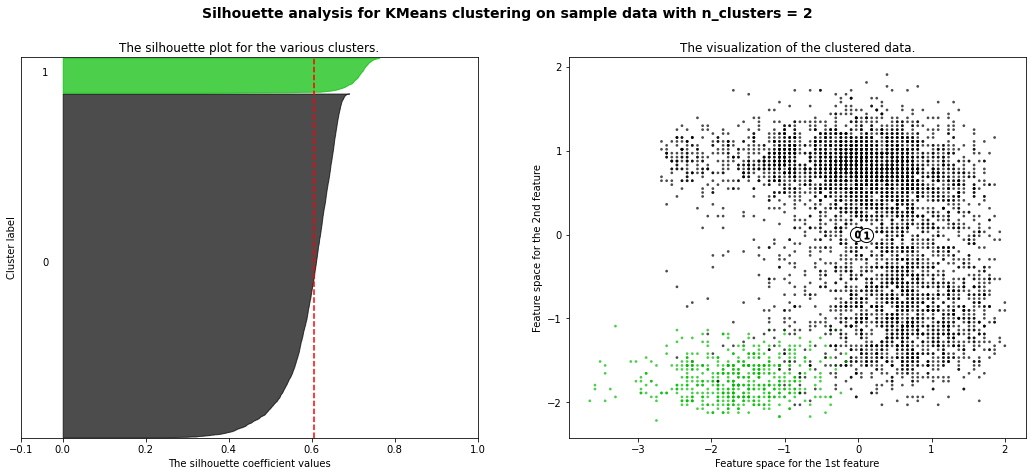

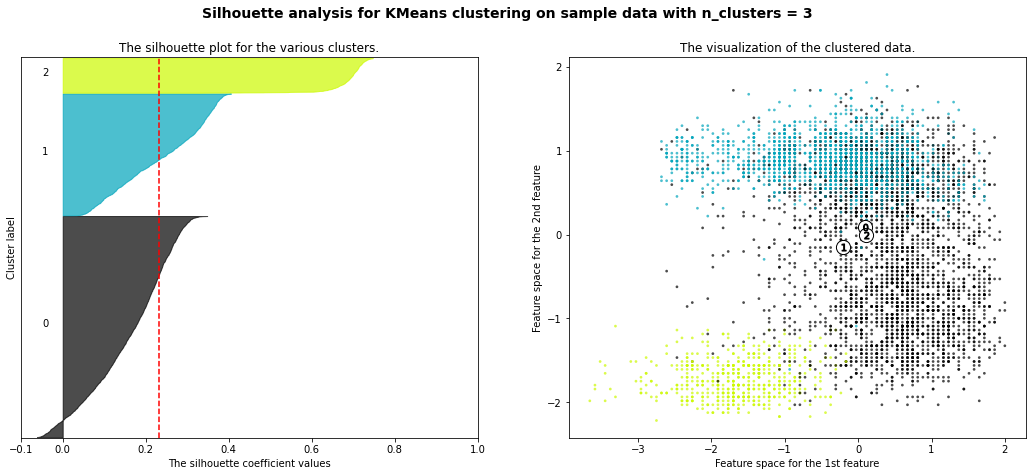

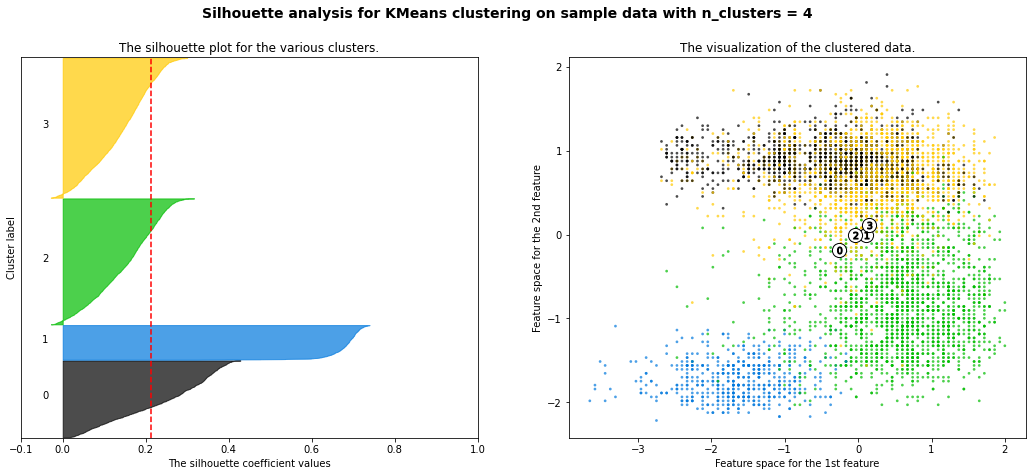

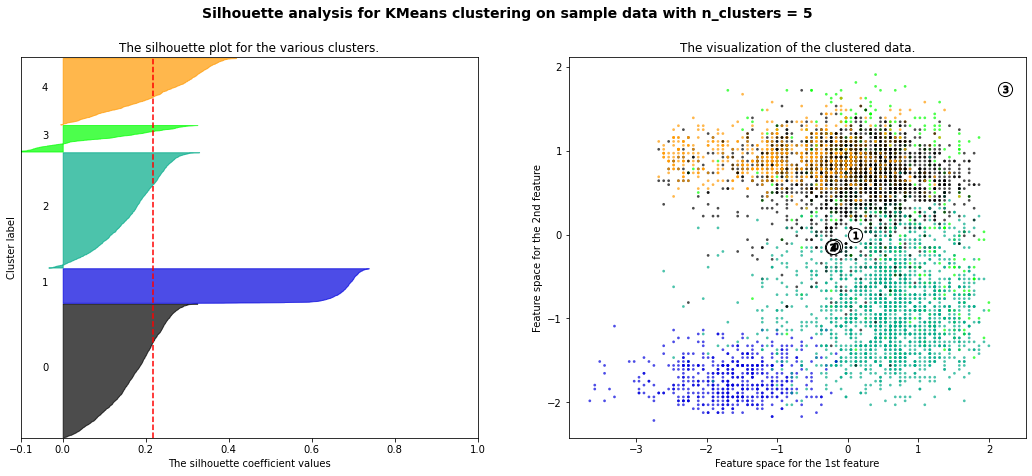

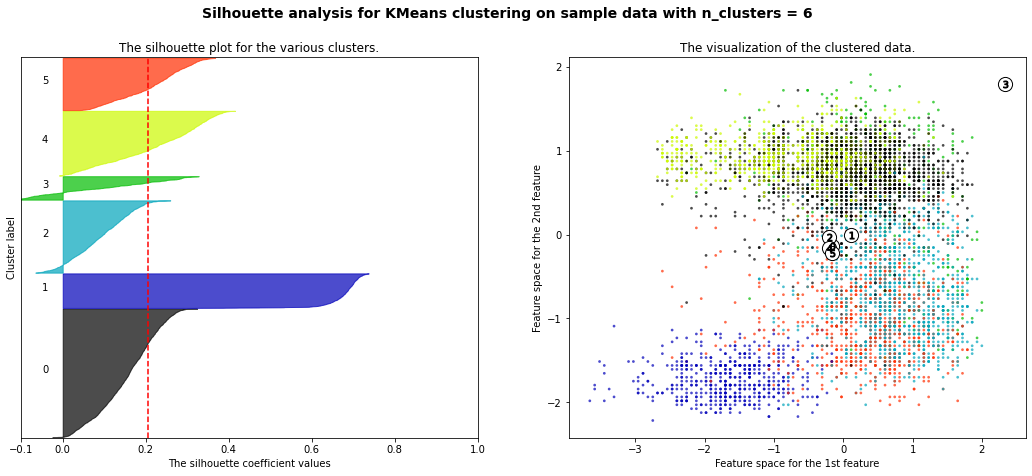

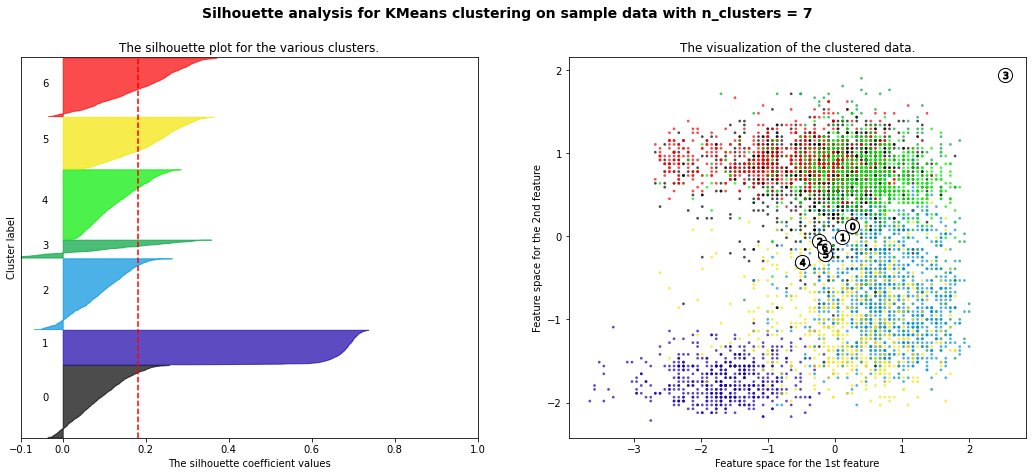

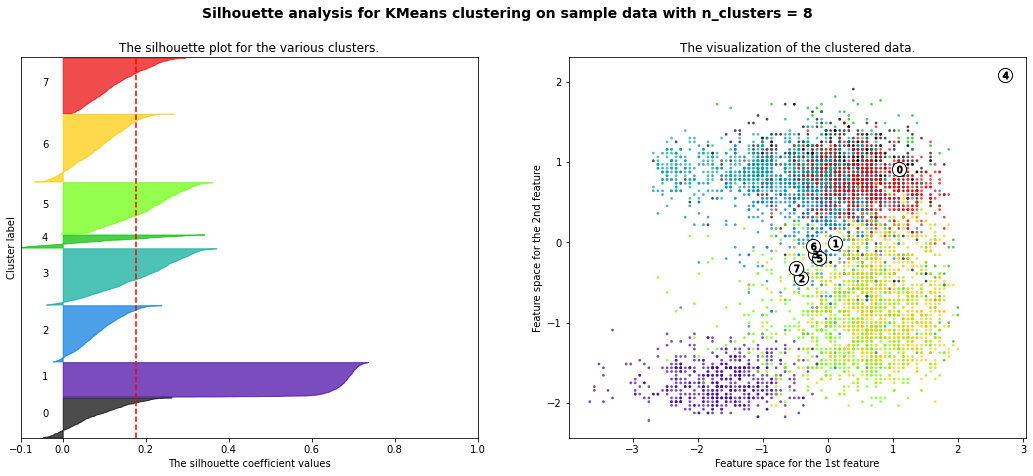

In [58]:
range_n_clusters = [2, 3, 4, 5, 6,7,8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(nuevo_dato) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(nuevo_dato)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(nuevo_dato, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(nuevo_dato, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    
    ax2.scatter(nuevo_dato[:,25], nuevo_dato[:, 40], 
                marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')


    # Labeling the clusters
    centers = clusterer.cluster_centers_

    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


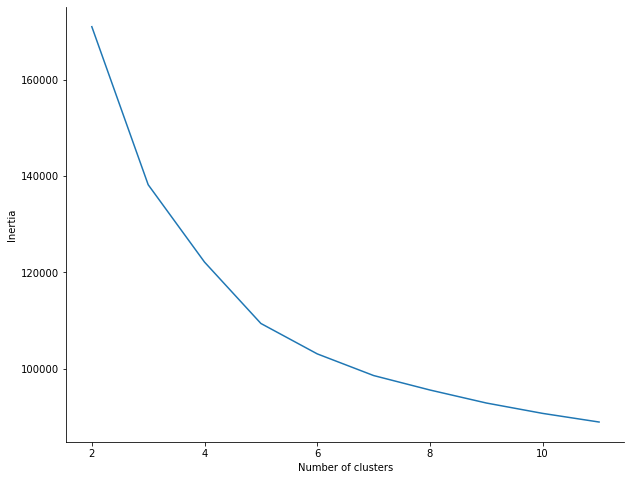

In [59]:
scores = [KMeans(n_clusters=i+2).fit(nuevo_dato).inertia_ for i in range(10)]

plt.figure(figsize=(10,8))

plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")

sns.despine()
plt.show()


In [60]:
#mean shift
from sklearn.cluster import MeanShift

In [61]:
ms = MeanShift(n_jobs=-1).fit(nuevo_dato)

In [62]:
clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print('Grupos: ', labels_unique)
print("Numero de clusters encontrado por Mean Shift : %d" % n_clusters_)

Grupos:  [0 1]
Numero de clusters encontrado por Mean Shift : 2


In [63]:
df_filtardo['grupos_meanshift'] = ms.labels_

In [64]:
df_filtardo[['GRUPOS','grupos_meanshift']]

,GRUPOS,grupos_meanshift
0,0,0
1,2,0
2,0,0
3,1,1
4,0,0
...,...,...
5653,1,1
5654,2,0
5655,2,0
5656,0,0


In [65]:
from bokeh.models import ColorBar, ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.plotting import figure, output_file, show
from bokeh.transform import linear_cmap
import bokeh.layouts
import bokeh.plotting
from bokeh.io import output_notebook

# Call once to configure Bokeh to display plots inline in the notebook.
output_notebook()

Loading BokehJS ...

In [66]:
#output_file("styling_linear_mappers.html", title="styling_linear_mappers.py example")

x = np.array(df_filtardo.attacking_finishing)
y = np.array(df_filtardo.defending_marking)

c =  np.array(df_filtardo.GRUPOS)
g = np.array(df_filtardo.GRUPOS)

#Use the field name of the column source
mapper = linear_cmap(field_name='y', palette=Spectral6 ,low=min(c +5) ,high=max(c))


colors = np.array([x for x in ('black', 'green', 'blue', 'red', 'gray')])
colors = np.hstack([colors])

source = ColumnDataSource(dict(x=x,y=y, colores=colors[c].tolist(), grupos= np.array(df_filtardo.GRUPOS) ))

In [67]:
p = figure(plot_width=600, plot_height=600, title="Color Map Based on Y")

p.circle(x='x', y='y', line_color='colores',  color='colores' , 
         fill_alpha=1, size=3, 
         source=source, legend_group='grupos')
p.legend.title= 'Grupos'


show(p)

In [68]:
x = np.array(df_filtardo.attacking_finishing)
y = np.array(df_filtardo.defending_marking)

c =  np.array(df_filtardo.grupos_meanshift )
g = np.array(df_filtardo.grupos_meanshift)

#Use the field name of the column source
mapper = linear_cmap(field_name='y', palette=Spectral6 ,low=min(c +5) ,high=max(c))


colors = np.array([x for x in ('black', 'green', 'blue', 'red', 'gray')])
colors = np.hstack([colors])

source = ColumnDataSource(dict(x=x,y=y, colores=colors[c].tolist(), grupos= np.array(df_filtardo.grupos_meanshift) ))

In [69]:


p = figure(plot_width=600, plot_height=600, title="Color Map Based on Y")

p.circle(x='x', y='y', line_color='colores',  color='colores' , 
         fill_alpha=1, size=3, 
         source=source, legend_group='grupos')
p.legend.title= 'Grupos'
show(p)

In [70]:
#DBscan     
from sklearn.cluster import DBSCAN

_dbscan = DBSCAN(min_samples=1, n_jobs=-1)

In [71]:
_dbscan.fit(nuevo_dato)

DBSCAN(min_samples=1, n_jobs=-1)

In [72]:
list(_dbscan.labels_)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [73]:
df_filtardo.head()

,overall,potential,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,...,value_eur_mill,wage_eur_mill,release_clause_eur_mill,pie_favorito,posicion_equipo,players_position_1,players_position_2,players_position_3,GRUPOS,grupos_meanshift
0,94.0,94.0,87.0,92.0,92.0,96.0,39.0,66.0,0.0,0.0,...,95.5,0.564941,195.75,0.0,26.0,12.0,3.0,14.0,0,0
1,93.0,93.0,90.0,93.0,82.0,89.0,35.0,78.0,0.0,0.0,...,58.5,0.405029,96.50,1.0,14.0,14.0,7.0,9.0,2,0
2,92.0,92.0,91.0,85.0,87.0,95.0,32.0,58.0,0.0,0.0,...,105.5,0.290039,195.25,1.0,0.0,8.0,0.0,9.0,0,0
3,91.0,93.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0,92.0,...,77.5,0.125000,164.75,1.0,5.0,5.0,9.0,9.0,1,1
4,91.0,91.0,91.0,83.0,86.0,94.0,35.0,66.0,0.0,0.0,...,90.0,0.469971,184.50,1.0,14.0,8.0,3.0,9.0,0,0


In [74]:
X = df_filtardo.iloc[:, [3, 4]].values
X

array([[92., 92.],
       [93., 82.],
       [85., 87.],
       ...,
       [64., 64.],
       [58., 68.],
       [66., 69.]], dtype=float16)

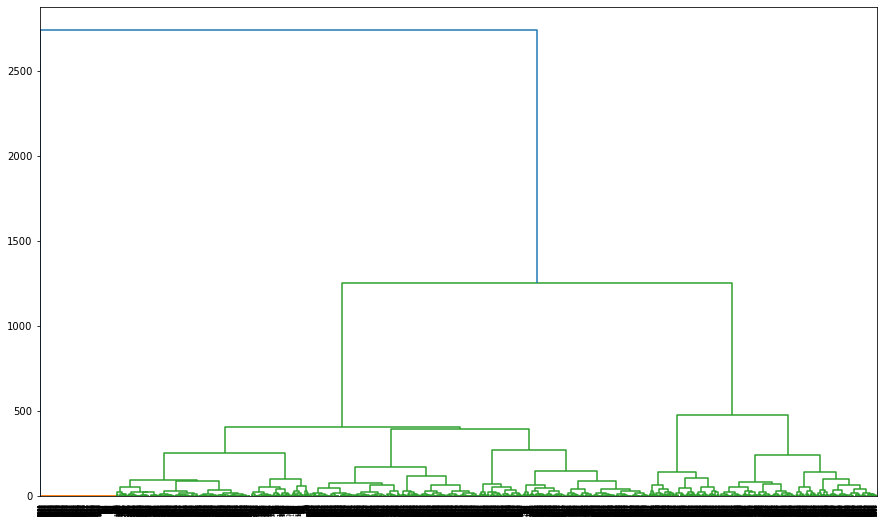

In [75]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,9))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))



## Embeddings

### Selección de características


*   Eliminar características con poca varianza (VarianceThreshold)
*   Eliminar características redundantes (mutual_info_classif)



In [76]:
from sklearn.feature_selection import VarianceThreshold
# Borrando columnas agregadas de los clusters previos

X = df_filtardo
#X.drop(['GRUPOS', 'grupos_meanshift'], axis=1, inplace=True)

selector = VarianceThreshold(0.90) 
X =selector.fit_transform(X)

In [77]:
df_filtardo.shape, X.shape

((5658, 58), (5658, 55))

In [78]:
df_filtardo.head()

,overall,potential,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,...,value_eur_mill,wage_eur_mill,release_clause_eur_mill,pie_favorito,posicion_equipo,players_position_1,players_position_2,players_position_3,GRUPOS,grupos_meanshift
0,94.0,94.0,87.0,92.0,92.0,96.0,39.0,66.0,0.0,0.0,...,95.5,0.564941,195.75,0.0,26.0,12.0,3.0,14.0,0,0
1,93.0,93.0,90.0,93.0,82.0,89.0,35.0,78.0,0.0,0.0,...,58.5,0.405029,96.50,1.0,14.0,14.0,7.0,9.0,2,0
2,92.0,92.0,91.0,85.0,87.0,95.0,32.0,58.0,0.0,0.0,...,105.5,0.290039,195.25,1.0,0.0,8.0,0.0,9.0,0,0
3,91.0,93.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0,92.0,...,77.5,0.125000,164.75,1.0,5.0,5.0,9.0,9.0,1,1
4,91.0,91.0,91.0,83.0,86.0,94.0,35.0,66.0,0.0,0.0,...,90.0,0.469971,184.50,1.0,14.0,8.0,3.0,9.0,0,0


Habria 3 variables removidas con poca variabilidad.

Partiendo del análisis del mapa de calor de correlación, se observa que los atributos vinculados al arquero (goalkeeper o gk) se encuentran altamente correlacionados por lo que podríamos quedarnos con uno o ninguno de esas características.

In [79]:
gk_feat =['gk', 'goal', 'defending_', 'wage_', 'release_']
gk_lst= '|'.join(gk_feat)
gk_feat =df_filtardo.columns[df_filtardo.columns.str.contains(gk_lst)]
gk_feat= gk_feat[1:]
gk_feat

Index(['gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'wage_eur_mill',
       'release_clause_eur_mill'],
      dtype='object')

In [80]:
X = df_filtardo
X = X.drop(gk_feat, axis=1)
X

,overall,potential,pace,shooting,passing,dribbling,defending,physic,gk_diving,attacking_crossing,...,mentality_penalties,mentality_composure,value_eur_mill,pie_favorito,posicion_equipo,players_position_1,players_position_2,players_position_3,GRUPOS,grupos_meanshift
0,94.0,94.0,87.0,92.0,92.0,96.0,39.0,66.0,0.0,88.0,...,75.0,96.0,95.500000,0.0,26.0,12.0,3.0,14.0,0,0
1,93.0,93.0,90.0,93.0,82.0,89.0,35.0,78.0,0.0,84.0,...,85.0,95.0,58.500000,1.0,14.0,14.0,7.0,9.0,2,0
2,92.0,92.0,91.0,85.0,87.0,95.0,32.0,58.0,0.0,87.0,...,90.0,94.0,105.500000,1.0,0.0,8.0,0.0,9.0,0,0
3,91.0,93.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0,13.0,...,11.0,68.0,77.500000,1.0,5.0,5.0,9.0,9.0,1,1
4,91.0,91.0,91.0,83.0,86.0,94.0,35.0,66.0,0.0,81.0,...,88.0,91.0,90.000000,1.0,14.0,8.0,3.0,9.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5653,70.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,16.0,...,14.0,55.0,1.099609,1.0,5.0,5.0,9.0,9.0,1,1
5654,70.0,70.0,83.0,60.0,66.0,70.0,36.0,57.0,0.0,68.0,...,59.0,62.0,1.900391,1.0,24.0,11.0,9.0,9.0,2,0
5655,70.0,70.0,80.0,64.0,64.0,75.0,25.0,63.0,0.0,63.0,...,55.0,69.0,1.700195,1.0,12.0,8.0,12.0,9.0,2,0
5656,70.0,70.0,73.0,58.0,68.0,74.0,57.0,79.0,0.0,62.0,...,57.0,67.0,1.599609,1.0,20.0,4.0,11.0,9.0,0,0


<AxesSubplot:>

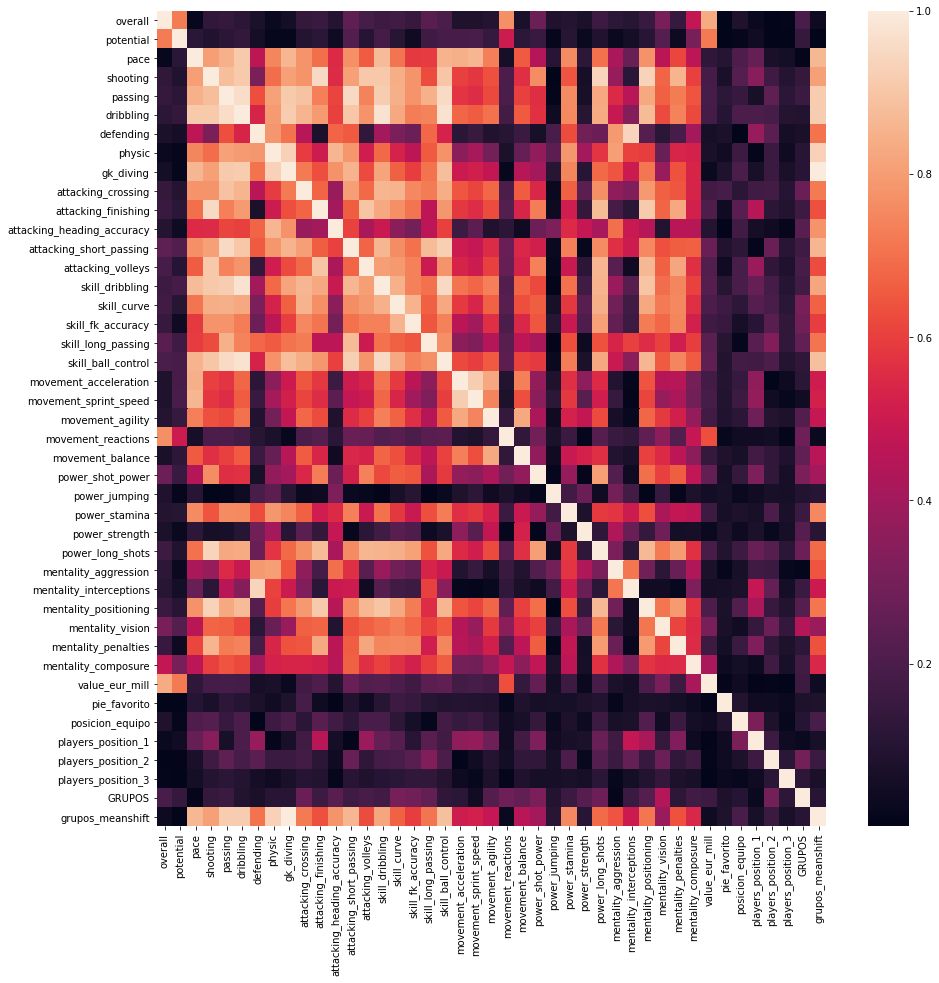

In [81]:
plt.figure(figsize=(15,15))
sns.heatmap(X.corr().abs(), annot=False,)

## Agrupamieto de características
### Principal components of analysis.

In [82]:
from sklearn import decomposition


pca_model=decomposition.PCA(n_components=0.95) #la cantidad de componenetes que expliquen el 95% de la varianza 

pca=pca_model.fit_transform(X) #input data is centered but not scaled for each feature before applying the SVD

print('proporción de varianza por componente: ', pca_model.explained_variance_ratio_)
print ('proporción de varianza por componente acumulada: ', pca_model.explained_variance_ratio_.cumsum())

print ('tamaño de los datos: ', pca.shape)

proporción de varianza por componente:  [0.61866199 0.15215647 0.05096897 0.04386815 0.01808241 0.01297902
 0.01036848 0.00947001 0.00829236 0.00730472 0.0069184  0.00649206
 0.00599183]
proporción de varianza por componente acumulada:  [0.61866199 0.77081847 0.82178743 0.86565558 0.88373799 0.89671701
 0.90708549 0.9165555  0.92484786 0.93215257 0.93907098 0.94556304
 0.95155487]
tamaño de los datos:  (5658, 13)


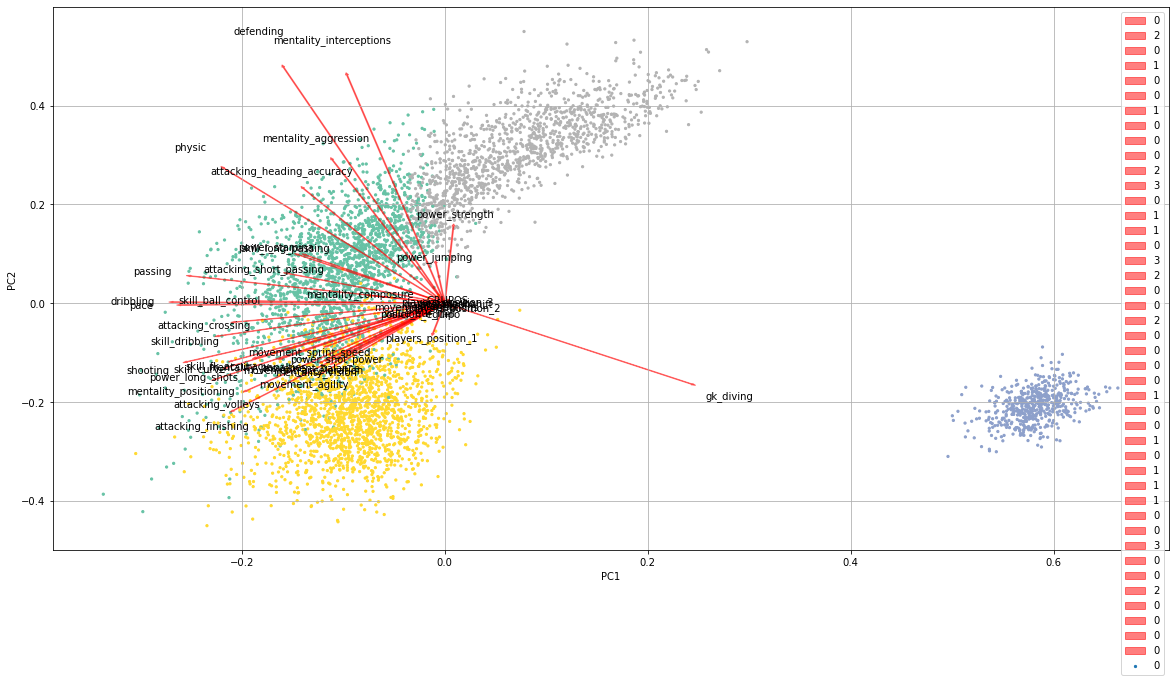

In [83]:
def myplot(score,coeff,groups,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.figure(figsize=(20,10)) 
    plt.scatter(xs * scalex,ys * scaley,s=5, c=groups, cmap='Set2' )
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'black', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'black', ha = 'center', va = 'center')
 

    plt.legend(groups)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

myplot(pca[:,0:2],np.transpose(pca_model.components_[0:2, :]), X.GRUPOS,list(X.columns))
plt.show()

In [84]:
#Vemos en el grafico de arriba un plot de las dos primeras dimensiones resultantes luego de aplicar PCA. Vemos una 'isla' con los arqueron, y vemos que la variable referida
# a las habilidades del arquero apunta hacia esa isla

Removemos los arqueros y volvemos a correr PCA

In [85]:
X_wgk = X[X.GRUPOS != 1]# dataset sin arqueros

In [86]:
pca_model=decomposition.PCA(n_components=0.95) #la cantidad de componenetes que expliquen el 95% de la varianza 

pca=pca_model.fit_transform(X_wgk) #input data is centered but not scaled for each feature before applying the SVD

# proporción de varianza
print('proporción de varianza por componente: ', pca_model.explained_variance_ratio_)
# proporción de varianza acumulada
print ('proporción de varianza por componente acumulada: ', pca_model.explained_variance_ratio_.cumsum())

print ('tamaño de los datos: ', pca.shape)

proporción de varianza por componente:  [0.45570019 0.14186337 0.10784225 0.06250687 0.02632757 0.02219884
 0.01945274 0.0168817  0.01491187 0.01406231 0.01327524 0.01213065
 0.00998957 0.00882828 0.00819093 0.00772715 0.00696215 0.00671425]
proporción de varianza por componente acumulada:  [0.45570019 0.59756357 0.70540582 0.76791269 0.79424026 0.8164391
 0.83589184 0.85277354 0.8676854  0.88174772 0.89502296 0.90715361
 0.91714318 0.92597146 0.93416239 0.94188954 0.94885169 0.95556595]
tamaño de los datos:  (5137, 18)


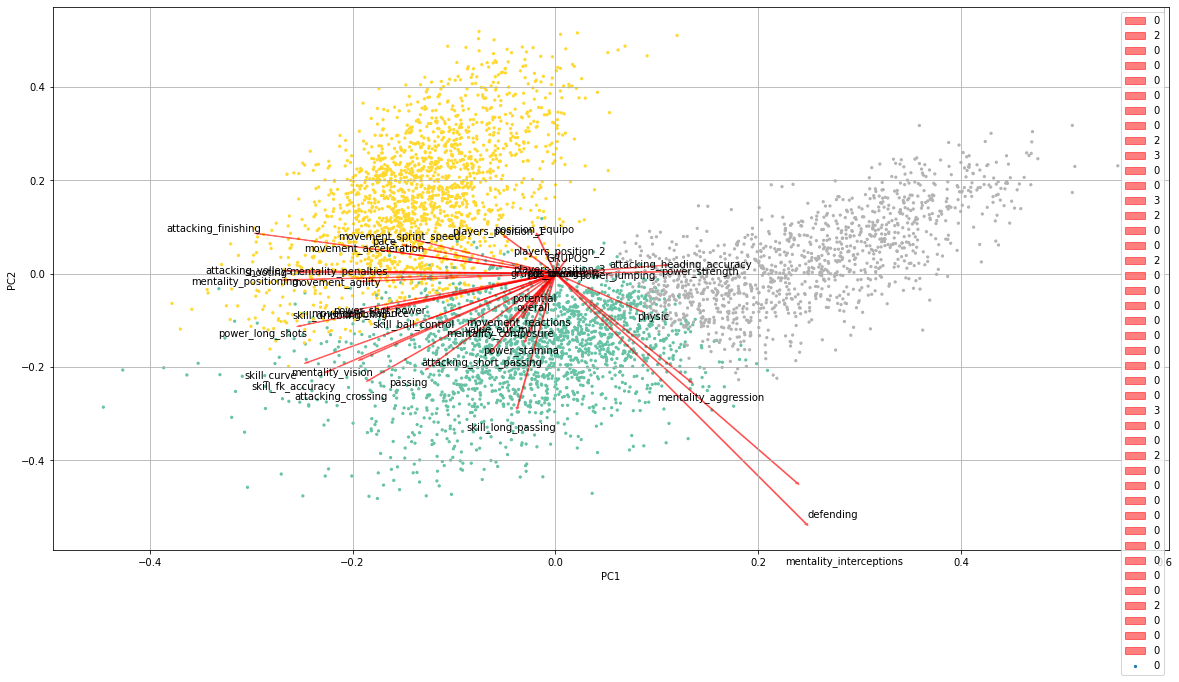

In [87]:
myplot(pca[:,0:2],np.transpose(pca_model.components_[0:2, :]), X_wgk.GRUPOS,list(X.columns))
plt.show()

In [88]:
df

,short_name,long_name,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,Lionel Andrés Messi Cuccittini,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,...,75,96,33,37,26,6,11,15,14,8
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,...,85,95,28,32,24,7,11,15,14,11
2,Neymar Jr,Neymar da Silva Santos Junior,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,...,90,94,27,26,29,9,9,15,15,11
3,J. Oblak,Jan Oblak,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,...,11,68,27,12,18,87,92,78,90,89
4,E. Hazard,Eden Hazard,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,...,88,91,34,27,22,11,12,6,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,Shao Shuai,邵帅,China PR,Beijing Renhe FC,48,56,40000,2000,CB,Right,...,39,41,45,50,52,5,5,13,5,14
18274,Xiao Mingjie,Mingjie Xiao,China PR,Shanghai SIPG FC,48,56,40000,2000,CB,Right,...,37,35,42,53,57,13,6,14,11,9
18275,Zhang Wei,张威,China PR,Hebei China Fortune FC,48,56,40000,1000,CM,Right,...,36,39,46,52,46,7,8,10,6,14
18276,Wang Haijian,汪海健,China PR,Shanghai Greenland Shenhua FC,48,54,40000,1000,CM,Right,...,36,40,39,44,54,14,9,13,13,13


In [89]:
kmeans

KMeans(n_clusters=4)

### Clustering con las variables resultantes del PCA

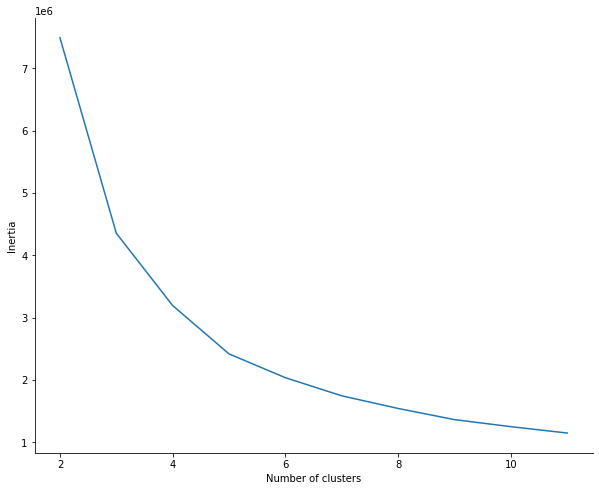

In [90]:
scores = [KMeans(n_clusters=i+2).fit(pca[:,0:2]).inertia_ for i in range(10)] #Elegimos los 4 primeros componenetes principales

plt.figure(figsize=(10,8))

plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")

sns.despine()
plt.show()


El gráfico indica elegir 4 clusters

In [91]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(pca[:,0:2])
kmeans.labels_


array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [92]:
x = pca[:,0:1]
y = pca[:,1:2]

c = kmeans.labels_
g = kmeans.labels_

#Use the field name of the column source
mapper = linear_cmap(field_name='y', palette=Spectral6 ,low=min(c +5) ,high=max(c))


colors = np.array([x for x in ('black', 'green', 'blue', 'red', 'gray')])
colors = np.hstack([colors])

source = ColumnDataSource(dict(x=x,y=y, colores=colors[c].tolist(), grupos= kmeans.labels_ ))

In [93]:
p = figure(plot_width=600, plot_height=600, title="Color Map Based on Y")

p.circle(x='x', y='y', line_color='colores',  color='colores' , 
         fill_alpha=1, size=3, 
         source=source, legend_group='grupos')
p.legend.title= 'Grupos'


show(p)